# Star type prediction using machine learning

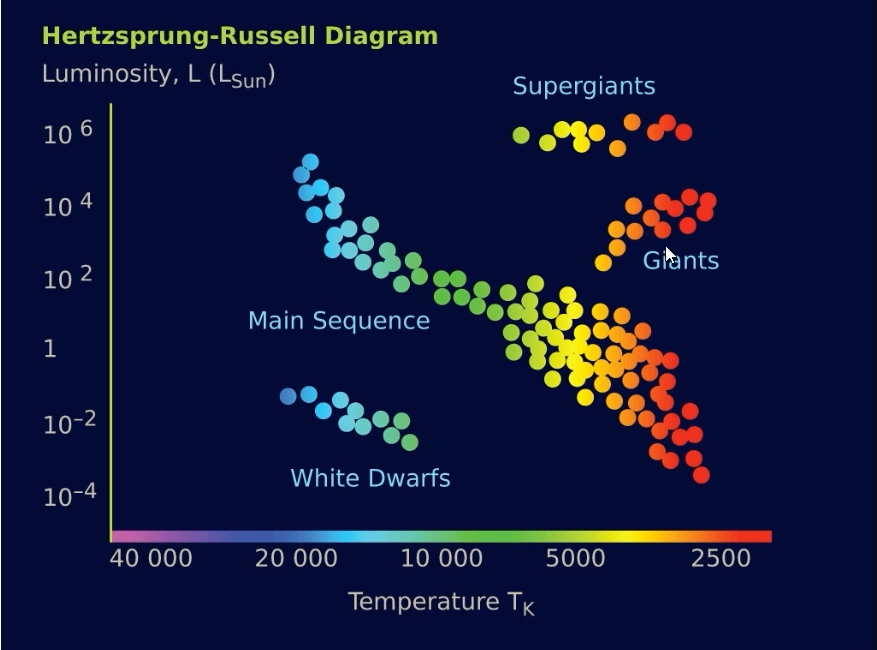

# 2) Import Libraries

In [37]:
# Libraries
import numpy as np
import pandas as pd

# 3) Explore the Star data

In [38]:
# Create the dataframe from CSV Data
star_df = pd.read_csv('star_type_ .csv')

In [39]:
# Show the random 10 rows in the dataset
star_df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
141,21020,0.00150,0.0112,11.520,White Dwarf
86,12010,0.00078,0.0092,12.130,White Dwarf
232,32489,648430.00000,1948.5000,-10.840,Supergiant
27,7700,0.00011,0.0128,14.470,White Dwarf
192,2994,0.00720,0.2800,13.450,Red Dwarf
120,3323,0.00043,0.0912,17.160,Brown Dwarf
154,25070,14500.00000,5.9200,-3.980,Main Sequence
165,7282,131000.00000,24.0000,-7.220,Hypergiant
137,3598,0.00110,0.5600,14.260,Red Dwarf
92,4077,0.08500,0.7950,6.228,Main Sequence


In [40]:
# Target Count
star_df['Star type'].value_counts()

Star type
Brown Dwarf      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
Hypergiant       40
Supergiant       40
Name: count, dtype: int64

In [41]:
# Fetch the generic information about the dataframe
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 9.5+ KB


# Prepare X_train and Y_train

In [42]:
# Save input features in X and target output in Y
x = star_df.iloc[:,:-1]
# y = star_df.iloc[:,-1]
y = star_df['Star type']
y

0      Brown Dwarf
1      Brown Dwarf
2      Brown Dwarf
3      Brown Dwarf
4      Brown Dwarf
          ...     
235     Supergiant
236     Supergiant
237     Supergiant
238     Supergiant
239     Supergiant
Name: Star type, Length: 240, dtype: object

In [43]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
# Perform the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [44]:
y_train

139        Red Dwarf
60       Brown Dwarf
204      White Dwarf
186      Brown Dwarf
207      White Dwarf
           ...      
106       Hypergiant
14         Red Dwarf
92     Main Sequence
179       Supergiant
102       Hypergiant
Name: Star type, Length: 192, dtype: object

# Create a pipeline

In [45]:
# Create the pipeline with Scaler and ML Model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create the pipeline with Standard Scaler and Logistic Regression Model
pipeline = Pipeline([
    ('scalar', StandardScaler()),                                                        # Step 1
    ('classifier', LogisticRegression(solver='newton-cg', multi_class='multinomial'))   # Step 2
])

# Train and Test the Logistic Regression Model

In [46]:
# Train the Logistic Regression using Pipeline
pipeline.fit(x_train, y_train)

c:\Users\hp\OneDrive\Desktop\SHIVAM\Spartificial\Python for Space Applications\M9 - Star Type API\star_type_api\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('scalar', StandardScaler()),
                ('classifier',
                 LogisticRegression(multi_class='multinomial',
                                    solver='newton-cg'))])

Note: If we apply StandardScaler to the training and testing dataset, then for each of the 2 sets, their will be 2 respective means and std. deviation. Hence, each set will be scaled differently. This will lead to wrong prediction. Thus, pipeline is used. It uses the mean of the training set used for Scaling it, to scale the testing set. This will lead to unbiased prediction.
Also : The pipeline automates the training process and is executed by calling its object.

In [47]:
# Make the Predictions
preds = pipeline.predict(x_test)

In [48]:
# Print the results
y_test # It's data type is pandas 1D object(series)
# To convert y_test values into array
actual = y_test.values
print(f'This is the actual output:-\n {actual}')
print(f'\nThis is the predicted output:-\n{preds}')

This is the actual output:-
 ['White Dwarf' 'Brown Dwarf' 'Main Sequence' 'Hypergiant' 'Hypergiant'
 'Supergiant' 'Supergiant' 'White Dwarf' 'Brown Dwarf' 'White Dwarf'
 'Hypergiant' 'White Dwarf' 'Supergiant' 'Hypergiant' 'Supergiant'
 'Supergiant' 'Brown Dwarf' 'Red Dwarf' 'Main Sequence' 'Brown Dwarf'
 'Brown Dwarf' 'Red Dwarf' 'Supergiant' 'Main Sequence' 'Supergiant'
 'Main Sequence' 'Red Dwarf' 'White Dwarf' 'Supergiant' 'Main Sequence'
 'Main Sequence' 'Hypergiant' 'White Dwarf' 'Brown Dwarf' 'Red Dwarf'
 'Brown Dwarf' 'Red Dwarf' 'Supergiant' 'Red Dwarf' 'Supergiant'
 'Hypergiant' 'Supergiant' 'Hypergiant' 'Red Dwarf' 'Main Sequence'
 'Brown Dwarf' 'Hypergiant' 'Main Sequence']

This is the predicted output:-
['White Dwarf' 'Brown Dwarf' 'Red Dwarf' 'Hypergiant' 'Hypergiant'
 'Supergiant' 'Supergiant' 'White Dwarf' 'Brown Dwarf' 'White Dwarf'
 'Hypergiant' 'White Dwarf' 'Supergiant' 'Hypergiant' 'Supergiant'
 'Supergiant' 'Brown Dwarf' 'Red Dwarf' 'Main Sequence' 'Brown Dwarf'


In [49]:
len(actual)

48

In [50]:
# Check on which index the prediction did not match the actual output
#incorrect_indexes = np.where(actual!=preds) # The where fn returns the 2D array of indices where the predicted and actual y values don't match
incorrect_indexes = np.where(actual!=preds)[0] # This will return the first element of that 2d array, that we want

# Print the actual and predicted label for the incorrect_index
for i,index in enumerate(incorrect_indexes, start = 0):
  # enumerate : adds a counter to the iterable , which is incorrect_indexes here
  print(f'{i+1}) The actual output was : {actual[index]}')
  print(f'{i+1}) The predicted output was : {preds[index]}')
  print()

1) The actual output was : Main Sequence
1) The predicted output was : Red Dwarf

2) The actual output was : Main Sequence
2) The predicted output was : Hypergiant



In [51]:
# Get the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(actual, preds))

0.9583333333333334


# Download the Pipeline and Test it

In [52]:
# Save the pipeline
from pickle import dump
with open('model.pkl', 'wb') as file:
  dump(pipeline, file)

In [53]:
# Load the pipeline
from pickle import load
with open('model.pkl', 'rb') as file:
  pipeline_test = load(file)

In [54]:
# Get data from the test set
x_test.iloc[1, :]

Temperature (K)           2637.00000
Luminosity(L/Lo)             0.00073
Radius(R/Ro)                 0.12700
Absolute magnitude(Mv)      17.22000
Name: 6, dtype: float64

In [55]:
# Get the feature list
features = x_test.columns.to_list()

In [56]:
# Making the prediction using the imported pipeline
test_data = pd.DataFrame([[2637, 0.00073, 0.127, 17.22]], columns=features)
output = pipeline_test.predict(test_data) # it gives the correct prediction, same as that was given by the original pipeline.
print(output)

['Brown Dwarf']
